Author: W.Dumindu Tharushika

Peer Reviewer: Lakindu Karunanayake

Notebook 2 Purpose: Develop and compare classification models (Logistic Regression, KNN, Naive Bayes) to predict breast cancer mortality status using the SEER dataset

#1. Data Loading and Exploration
Leveraged from Week 3 Code Reuse Session:

Task 1: import pandas as pd

Task 2: pd.read_csv(filepath)

Task 3: data.head()

Task 4: data.info()

Purpose: Import necessary libraries, load the preprocessed dataset, and examine its structure

Justification: Understanding data structure is essential before building any ML models (Case Study A, Task 4)

In [28]:
# Import the pandas library for data manipulation
import pandas as pd
# Load the preprocessed mortality status dataset into a DataFrame
df = pd.read_csv('/content/mortality_status.csv')
# Display the first 15 rows to examine data structure
df.head(15)

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Mortality_Status
0,1.558564,0,0,0,0,1,2,1,-1.259147,1,1,1.183528,-0.617827,0
1,-0.446019,0,1,1,2,0,1,1,0.221459,1,1,-0.045820,0.166743,0
2,0.444907,0,2,2,4,0,1,1,1.558781,1,1,-0.045820,0.559028,0
3,0.444907,0,0,0,0,1,2,1,-0.590486,1,1,-1.521038,-0.617827,0
4,-0.780117,0,1,0,1,1,2,1,0.508028,1,1,-1.398103,-0.617827,0
5,-0.334654,0,0,0,0,0,1,1,-0.494963,1,1,0.445919,-0.421684,0
6,-0.334654,0,0,0,0,3,0,1,-1.068101,1,1,-0.414625,-0.617827,0
7,-1.559677,0,1,0,1,0,1,1,-0.017348,1,1,-0.660494,-0.617827,1
8,-1.559677,0,3,2,4,1,2,1,3.469240,1,1,0.691789,2.716595,0
9,1.669930,0,3,2,4,3,0,0,0.078175,1,1,0.814723,1.539740,0


In [29]:
# Get information about data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4003 entries, 0 to 4002
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4003 non-null   float64
 1   Sex                     4003 non-null   int64  
 2   T_Stage                 4003 non-null   int64  
 3   N_Stage                 4003 non-null   int64  
 4   6th_Stage               4003 non-null   int64  
 5   Differentiated          4003 non-null   int64  
 6   Grade                   4003 non-null   int64  
 7   A_Stage                 4003 non-null   int64  
 8   Tumor_Size              4003 non-null   float64
 9   Estrogen_Status         4003 non-null   int64  
 10  Progesterone_Status     4003 non-null   int64  
 11  Regional_Node_Examined  4003 non-null   float64
 12  Reginol_Node_Positive   4003 non-null   float64
 13  Mortality_Status        4003 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 4

#2. Feature and Target Selection
Leveraged from Week 6 Code Reuse Session:

Task 6: Define input features and target variable

Purpose: Separate features (X) from target variable (y) for model training

Justification: Proper data preparation is critical for valid model development (Case Study A, Task 5)

In [30]:
#create a dataframe with all training data except the target column
X = df.drop(columns=['Mortality_Status'])
# here, we select one target variable to model, Traffic_Type
y = df['Mortality_Status']
#check that the list of input variables
list(X)

['Age',
 'Sex',
 'T_Stage',
 'N_Stage',
 '6th_Stage',
 'Differentiated',
 'Grade',
 'A_Stage',
 'Tumor_Size',
 'Estrogen_Status',
 'Progesterone_Status',
 'Regional_Node_Examined',
 'Reginol_Node_Positive']

#3. Data Splitting

Leveraged from Week 6 Code Reuse Session:

Task 7: Import train_test_split function

Task 8: Split data with stratification and random state

Purpose: Split data into training and testing sets for model evaluation

Justification: Separate test data ensures unbiased model evaluation (Case Study A, Task 6)

In [31]:
# Import the train_test_split function from sklearn
from sklearn.model_selection import train_test_split
# Split data into 80% training and 20% testing sets
# random_state ensures reproducibility
# stratify ensures balanced distribution of target classes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#4. Logistic Regression Model

Leveraged from Week 7 Code Reuse Session:

Task 9: Import LogisticRegression class

Task 10: Initialize logistic regression model

Task 11: Train the model on training data

Task 12: Predict on training data

Task 13: Predict on test data

Task 14: Create comparison dataframe

Purpose: Build, train and test a Logistic Regression model

Justification: Logistic regression is appropriate for binary classification tasks (Case Study A, Task 7)

In [32]:
# Import the LogisticRegression class from sklearn
from sklearn.linear_model import LogisticRegression
# Initialize the logistic regression model with default parameters
logreg = LogisticRegression()
# Train the model on the training data
logreg.fit(X_train, y_train)
# Make predictions on the training data to check for overfitting
y_pred_logreg_train = logreg.predict(X_train)
# Make predictions on the test data for evaluation
y_pred_logreg_test = logreg.predict(X_test)
# Create a comparison dataframe to visualize actual vs predicted values
Comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_logreg_test})
# Display the comparison dataframe
Comparison_df

,Actual,Predicted
691,0,0
305,1,0
3149,0,0
1359,0,0
3432,0,0
...,...,...
3676,0,0
1269,0,0
2686,0,0
731,0,0


#5. Logistic Regression Evaluation

Leveraged from Week 8 Code Reuse Session:

Task 15: Calculate accuracy on training data

Task 16: Calculate accuracy on test data

Task 17: Create and display confusion matrix

Task 18: Generate classification report

Task 19: Create ROC curve display

Purpose: Evaluate Logistic Regression model performance using multiple metrics

Justification: Multiple evaluation metrics provide comprehensive model assessment (Case Study A, Task 8)

In [33]:
# Import the accuracy_score function to evaluate model performance
from sklearn.metrics import accuracy_score
# Calculate and print the accuracy on the training data
accuracy = accuracy_score(y_train, y_pred_logreg_train)
print("The accuracy is: ", accuracy)

The accuracy is:  0.8575890068707058


In [34]:
# Calculate and print the accuracy on the test data
accuracy = accuracy_score(y_test, y_pred_logreg_test)
print("The accuracy is: ", accuracy)

The accuracy is:  0.8539325842696629


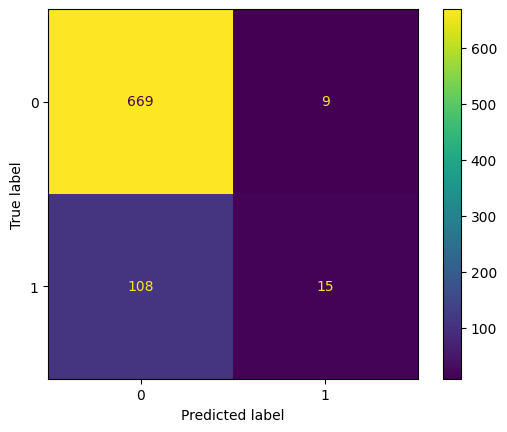

In [35]:
# Import confusion matrix functionality
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# Create a confusion matrix for the test predictions
cm = confusion_matrix(y_test, y_pred_logreg_test, labels=logreg.classes_)
# Display the confusion matrix as a plot
disp = ConfusionMatrixDisplay(cm, display_labels=logreg.classes_)
disp.plot()

In [36]:
# Import and generate the classification report with precision, recall, and F1 score
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_logreg_test))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       678
           1       0.62      0.12      0.20       123

    accuracy                           0.85       801
   macro avg       0.74      0.55      0.56       801
weighted avg       0.82      0.85      0.81       801



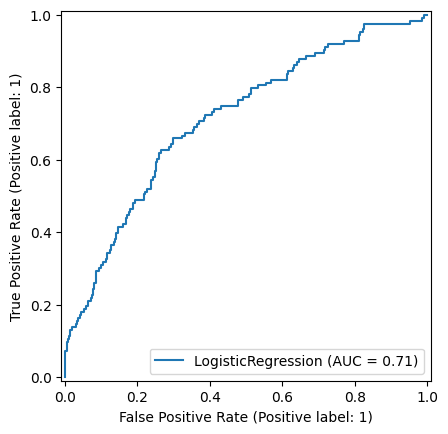

In [37]:
# Import and create ROC curve display for the logistic regression model
from sklearn.metrics import RocCurveDisplay
logreg = RocCurveDisplay.from_estimator(logreg, X_test, y_test)

#6. K-Nearest Neighbors Model

Leveraged from Week 7 Code Reuse Session:

Task 20: Import KNeighborsClassifier

Task 21: Initialize KNN model with neighbors parameter

Task 22: Train KNN model

Task 23: Predict using KNN model

Purpose: Build, train and test an unoptimized K-Nearest Neighbors model

Justification: KNN is a non-parametric method suitable for classification tasks (Case Study A, Task 9)

In [38]:
# Import the KNeighborsClassifier from sklearn
from sklearn.neighbors import KNeighborsClassifier
# Initialize the KNN classifier with 9 neighbors
knn = KNeighborsClassifier(n_neighbors=9)
# Train the KNN model on the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [39]:
# Make predictions on the test data
knn.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       678
           1       0.43      0.08      0.14       123

    accuracy                           0.84       801
   macro avg       0.64      0.53      0.53       801
weighted avg       0.79      0.84      0.79       801



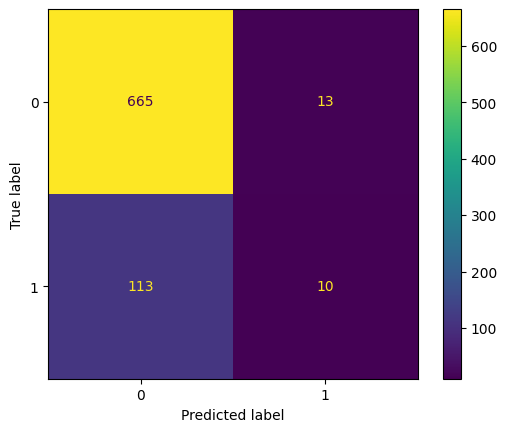

In [40]:
# Predict using the unoptimized KNN model
y_pred_knn_unopt = knn.predict(X_test)
# Generate confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn_unopt, labels=knn.classes_)
# Display the confusion matrix
disp_knn = ConfusionMatrixDisplay(cm_knn, display_labels=knn.classes_)
disp_knn.plot()
# Print the classification report for the KNN model
print(classification_report(y_test, y_pred_knn_unopt))

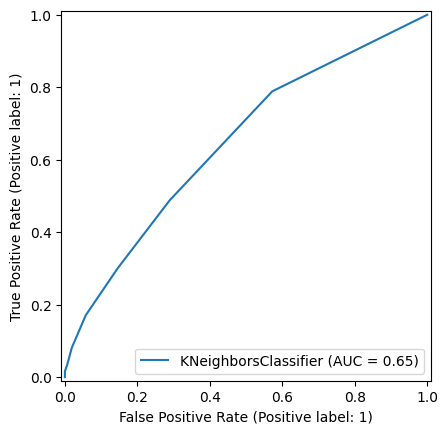

In [41]:
# Create and display ROC curve for the KNN model
knn_roc1 = RocCurveDisplay.from_estimator(knn, X_test, y_test)

#7. K-Nearest Neighbors Optimization
Leveraged from Week 7 Code Reuse Session:

Task 24: Import GridSearchCV for hyperparameter tuning

Task 25: Define parameter grid and perform grid search

Task 26: Predict with optimized model

Purpose: Optimize KNN model hyperparameters using grid search

Justification: Hyperparameter tuning improves model performance (Case Study A, Task 10)

In [42]:
# Import GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
import numpy as np
# Initialize a new KNN classifier for optimization
knn = KNeighborsClassifier()
# Define parameter grid to search: different numbers of neighbors and distance metrics
param_grid = {'n_neighbors': np.arange(1, 25), 'metric': ['euclidean', 'manhattan']}
# Create GridSearchCV object with 5-fold cross-validation and ROC AUC scoring
knn_gscv = GridSearchCV(knn, param_grid, cv=5, scoring='roc_auc')
# Fit the grid search to find optimal parameters
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             scoring='roc_auc')

In [43]:
# Print the best parameters found by grid search
print("Best KNN Parameters:", knn_gscv.best_params_)

Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': np.int64(23)}


              precision    recall  f1-score   support

           0       0.85      1.00      0.92       678
           1       0.88      0.06      0.11       123

    accuracy                           0.85       801
   macro avg       0.86      0.53      0.51       801
weighted avg       0.86      0.85      0.80       801



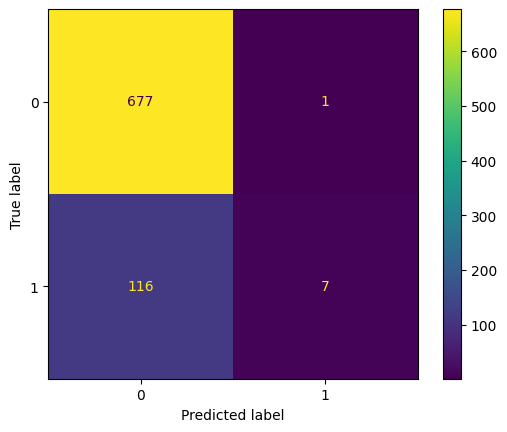

In [44]:
# Make predictions with the optimized KNN model
y_pred_knn_opt = knn_gscv.predict(X_test)
# Create confusion matrix for the optimized KNN model
cm_knn_gscv = confusion_matrix(y_test, y_pred_knn_opt, labels=knn_gscv.classes_)
# Display the confusion matrix
disp_knn_gscv_cm = ConfusionMatrixDisplay(cm_knn_gscv, display_labels=knn_gscv.classes_)
disp_knn_gscv_cm.plot()
# Display the classification report for the optimized KNN model
print(classification_report(y_test, y_pred_knn_opt))

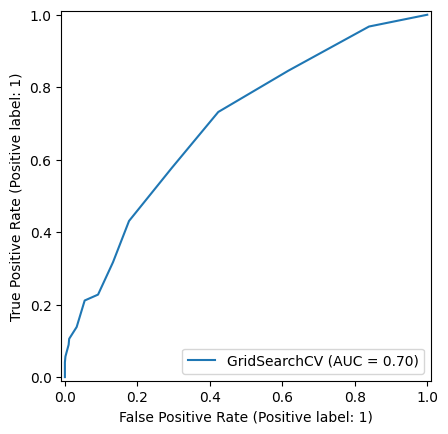

In [45]:
# Create and display ROC curve for the optimized KNN model
knn_roc = RocCurveDisplay.from_estimator(knn_gscv, X_test, y_test)

#8. Naive Bayes Model

Leveraged from Week 7 Code Reuse Session:

Task 27: Import, initialize, and train Naive Bayes model

Purpose: Build, train and test a Gaussian Naive Bayes model

Justification: Naive Bayes is efficient for classification with the naive feature independence assumption (Case Study A, Task 11)

In [46]:
# Import the GaussianNB class from sklearn
from sklearn.naive_bayes import GaussianNB
# Initialize the Gaussian Naive Bayes model
nb = GaussianNB()
# Train the Naive Bayes model on the training data
nb.fit(X_train, y_train)
# Make predictions on the test data
y_pred_nb = nb.predict(X_test)
# Print the classification report for the Naive Bayes model
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       678
           1       0.33      0.37      0.35       123

    accuracy                           0.79       801
   macro avg       0.61      0.62      0.61       801
weighted avg       0.80      0.79      0.79       801



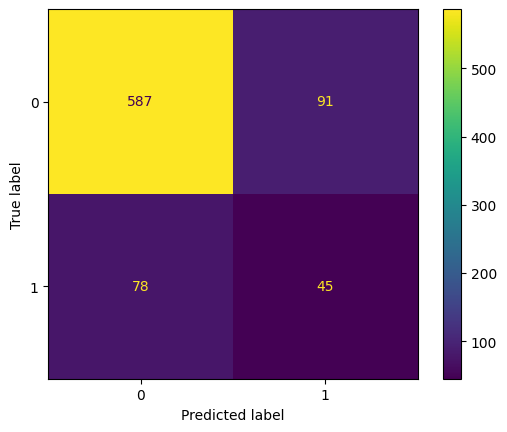

In [47]:
# Create confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb, labels=nb.classes_)
# Display it
disp_nb = ConfusionMatrixDisplay(cm_nb, display_labels=nb.classes_)
disp_nb.plot()

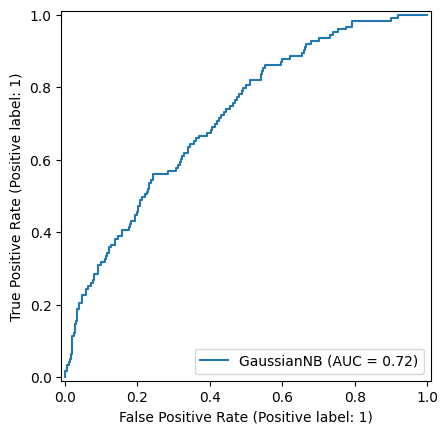

In [48]:
# Create and display ROC curve for the Naive Bayes model
nb_roc = RocCurveDisplay.from_estimator(nb, X_test, y_test)